# Background: we have screenshots that have a lot of unwanted/unrequired data the we want to get rid of. The data we need is basically a rectangular area with black background.

## In this code we are extracting that ractangle ROI(Region of Intrest) out of the screenshots. 

In [91]:
#import the required libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [92]:
#read the image into the python code to manipulate
img =cv2.imread('3.png')

#convert the color image to greyscale for thresholding later
#helpfull as we need to crop color image in the end thats why instead of opeing image directly in greyscale we load in colour get contours in grey scale 
#and then crop the color image and save back according to the contours we got
img_gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);

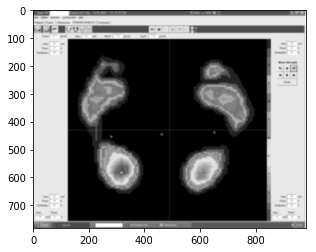

In [93]:
#plot and check if the image has been loaded correctly
plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic')

125 103 715 655


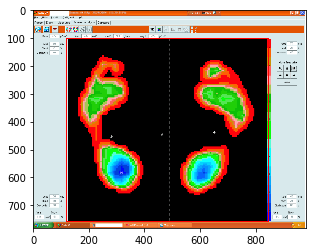

In [94]:

ret,thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY)


IMAGE,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,  cv2.CHAIN_APPROX_SIMPLE)

#sorts all the contours in desecnding order and get only two of the largest contours whcih are 1-whole image and 2-ROI
# we only take the second highest ractangle using key ContourArea and plot that.
cnt = sorted(contours, key = cv2.contourArea, reverse = True)[1:2]



#loops through all the highest contours and adds rectangle around them which is then added to the image 
#in this no point of for loop as we are only getting one second highest rctangle wrt area

for c in cnt:
    x,y,w,h = cv2.boundingRect(c)
    print(x,y,w,h)
                
    x2 = x+w+5    #added these 5 pixels padding to the height and width of the image
    y2 = y+h
    
    #annotated image that has all the bounding boxes around the countour areas
    #img_ant=cv2.rectangle(img, (x-5,y), (x2,y2), (255,0,0), 2)   #padded 5 pixel in each x,y axis to starting point 
    
#plot and check if the image has been loaded correctly
plt.imshow(img_ant)

#cv2.imwrite('imgg.jpg',imgg)

In [95]:
#cropping the orignal colour image from the size of ROI we got from contours
cropped_img = img[y:y+h, x:x+w]

In [96]:
#write the required part of image as a seprate image after the extraction 
cv2.imwrite('cropped_img.jpg',cropped_img)

True